# Projeto Prático Perceptron Rosenblatt

Neste projeto prático, o objetivo é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado do neurônio Perceptron de Rosenblatt aplicado em problemas de classificação.

### Equipe:
1. Afonso Henrique Torres Lucas | ifonso.developer@gmail.com | iFonso - 2215080047

2. Erik Gustavo Lima de Oliveira | erik.exatas10@gmail.com | ErikExatas - 2115080049

3. David Augusto De Oliveira E Silva | david-augusto-silva - 2115080006

4. Lilian Iazzai De Souza Oliveira | lilianiazzai@gmail.com | lilianiazzai - 2215080018

5. Vitor Nascimento Aguiar | Vtaguiar1909 - 2115080055

In [1]:
# identificador do arquivo
id = (7+9+6+8+5)%4
print(id)

3


### 2.1. Parte I – Resolvendo um Problema Linearmente Separável

Nesta parte, todas as equipes devem usar o arquivo dataAll.txt e construir o algoritmo de treinamento do neurônio perceptron para resolver o problema de classificação proposto. Alguns aspectos devem ser considerados:

1. As equipes devem utilizar a função de ativação degrau com θ = 0;
2. O valor da taxa de aprendizado deve ser igual a η = 0,1;
3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo;
4. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os exemplos presentes no conjunto de treinamento;
5. Ao final, deve-se imprimir:
(a) O número total de ajustes no vetor de pesos;
(b) O número de épocas até a convergência;
(c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm

In [3]:
with open('dataAll.txt', 'rb') as f:
    data = f.read()

In [4]:
type(data)

bytes

Após a leitura do arquivo binário, reconstruímos os dados como array de float64, redimensionamos para (m, 1, 3) e tiramos o extra do meio, ficando no formato (m, 3)

In [5]:
array = np.frombuffer(data, dtype=np.float64) # reconstruindo
m = array.size // 3

dados = array.reshape((m, 1, 3)) # redimensionando

dados = dados.reshape(-1, 3) # retirando o extra do meio

In [6]:
dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [7]:
X = dados[:, :2]
y = dados[:, 2]

In [8]:
# parâmetros definidos pela questão
eta = 0.1
theta = 0
max_epocas = 1000  # evita loop infinito em testes

In [9]:
# pesos aleatórios em distribuição uniforme em [-0.5, 0.5]
w = np.random.uniform(-0.5, 0.5, size=3)  # [w0, w1, bias]
print(f"Pesos iniciais: {w}")

Pesos iniciais: [-0.10983822  0.22449568 -0.43156832]


In [10]:
# adicionando coluna de bias (x0 = 1) aos dados
X_bias = np.c_[np.ones(X.shape[0]), X]  # shape = (m, 3)

In [11]:
ajustes = 0
epocas = 0
convergiu = False

while not convergiu and epocas < max_epocas:
    convergiu = True
    for xi, yi in zip(X_bias, y):
        u = np.dot(w, xi)
        y_pred = 1 if u >= theta else 0
        erro = yi - y_pred
        if erro != 0:
            w += eta * erro * xi
            ajustes += 1
            convergiu = False
    epocas += 1


Total de ajustes: 162
Épocas até convergência: 9


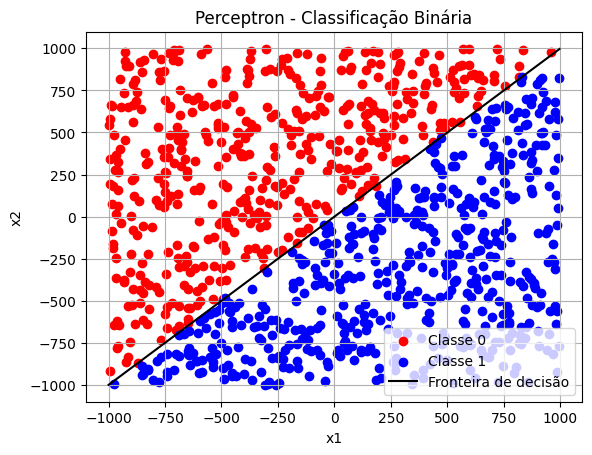

In [12]:
print(f"\nTotal de ajustes: {ajustes}")
print(f"Épocas até convergência: {epocas}")

# separando as classes para o gráfico
classe_0 = X[y == 0]
classe_1 = X[y == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='red', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='blue', label='Classe 1')

# reta de decisão: w0 + w1*x1 + w2*x2 = 0  => x2 = -(w0 + w1*x1)/w2
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1]*x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True)
plt.show()